<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
np.random.seed(42)

In [4]:
def generate_train_data(num_samples, num_features=2):
    # Feature set containing (x,y) values of 25 known/training data
    data_size = (num_samples, num_features)
    train_data = np.random.randint(0, 100, data_size)
    
    labels = np.random.randint(0, 2, num_samples)
    
    return train_data.astype(np.float32), labels

In [5]:
train_data, labels = generate_train_data(10)

In [6]:
train_data

array([[ 51.,  92.],
       [ 14.,  71.],
       [ 60.,  20.],
       [ 82.,  86.],
       [ 74.,  74.],
       [ 87.,  99.],
       [ 23.,   2.],
       [ 21.,  52.],
       [  1.,  87.],
       [ 29.,  37.]], dtype=float32)

In [7]:
train_data[0], labels[0]

(array([ 51.,  92.], dtype=float32), 1)

In [8]:
# Assign label 0 => red
red = train_data[labels.ravel() == 0]

# Assign label 1 => blue
blue = train_data[labels.ravel() == 1]

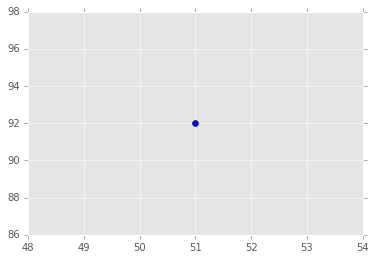

In [9]:
plt.plot(train_data[0, 0], train_data[0, 1], 'ob')

In [10]:
def plot_scatter(all_red=None, all_blue=None, newcomer=None):
    if all_red is None and all_blue is None and newcomer is None:
        print('Nothing to plot.')
        return
    
    plt.figure(figsize=(10, 6))
    if all_red is not None:
        plt.scatter(red[:, 0], red[:, 1], c='r', marker='^', s=180, label='red')
    if all_blue is not None:
        plt.scatter(blue[:, 0], blue[:, 1], c='b', marker='s', s=150, label='blue')
    if newcomer is not None:
        plt.scatter(newcomer[:, 0],newcomer[:, 1], c='g', marker='o', s=180, label='new')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(loc='lower left')

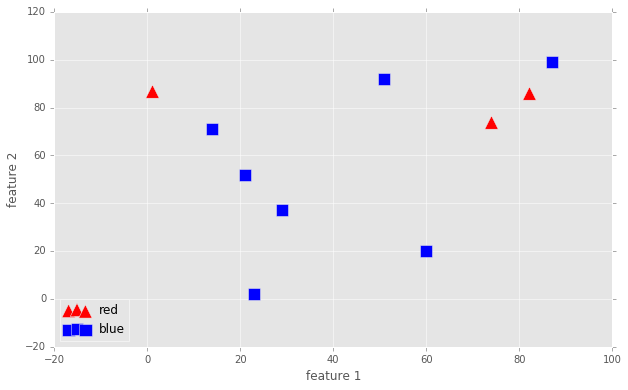

In [11]:
plot_scatter(red, blue)

In [12]:
def get_newcomer():
    return np.random.randint(0,100,(1,2)).astype(np.float32)

In [13]:
newcomer = get_newcomer()

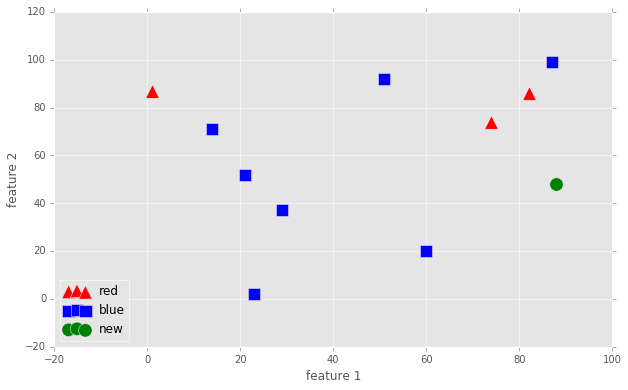

In [14]:
plot_scatter(red, blue, newcomer)

In [15]:
knn = cv2.ml.KNearest_create()
ret = knn.train(train_data, cv2.ml.ROW_SAMPLE, labels.astype(np.int32))

In [16]:
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)
print("predicted label:\t", results)
print("neighbours' labels:\t", neighbours)
print("distance to neighbors:\t", dist)

predicted label:	 [[ 0.]]
neighbours' labels:	 [[ 0.  0.  1.]]
distance to neighbors:	 [[  872.  1480.  1568.]]


In [17]:
knn.setDefaultK(1)
knn.predict(newcomer)

(0.0, array([[ 0.]], dtype=float32))

In [18]:
knn.setDefaultK(3)
knn.predict(newcomer)

(0.0, array([[ 0.]], dtype=float32))

In [19]:
knn.setDefaultK(5)
knn.predict(newcomer)

(1.0, array([[ 1.]], dtype=float32))

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >